# MA204 Numerical Lab



### 1. Stock Investment Model


> You make an initial investment of $V_{0}$ dollars in a certain stock and additional monthly contributions of $p$ dollars. Instead of a fixed rate $r$ of interest, the stock may gain or lose value in each time period. We assume that the stock’s value could change, in some random fashion, positively or negatively by as much as 5% per month.



(a).

$V_{n} = (1 + r_{n})V_{n - 1} + p$

The above equation models the situation. $V_{n}$ is your investment value after $n$ months. $r_{n}$ is the fraction of the investment value of the previous month that was gained or lost. It is a random number in the interval [-0.05, 0.05]. This model is recursive and works because $(1 + r_{n})V_{n - 1}$ takes the sum of the investment value of the previous month plus the amount gained or lost. And, $p$ is added on as the monthly contribution.

(b)

The following Python code implements the model, producing the investment value data over a 10-year period with an initial investment of 1000 dollars and monthly payments of 10 dollars.




In [27]:
from random import random

Vo = 1000 #initial investment
InvestmentValues = [1000]
VoMax = Vo
for i in range(0, 120):
    r = (random()/10) - 0.05 #returns a random number between -0.05 and 0.05
    V = (1 + r)*Vo + 10 #model with a monthly payment of $10
    InvestmentValues.append(V)
    Vo = V

(c)

The following code plots the data produced.

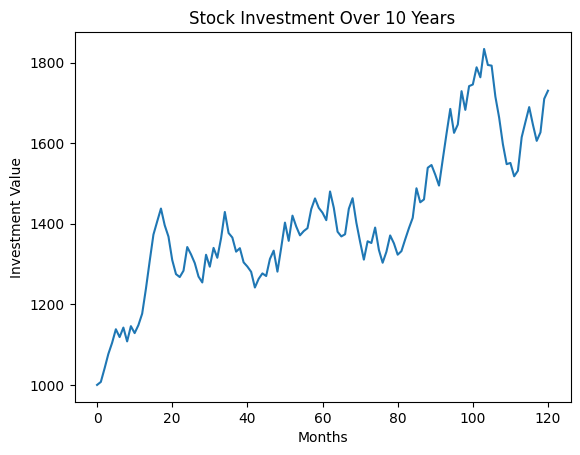

1730.298193694186


In [28]:
import matplotlib.pyplot as plt
import numpy as np

investment = np.array(InvestmentValues[0:121])

plt.plot(investment)
plt.xlabel("Months")
plt.ylabel("Investment Value")
plt.title("Stock Investment Over 10 Years")
plt.show()

The value of the investment at the end of the tenth year, $V_{120}$:

In [ ]:
print(InvestmentValues[120])

(d)

The following code has been modifies so that, in the case that the investment value does not double within 10 years, it will iterate until the investment value doubles (reaches 2000 dollars). The for loop then goes through all the investment values until it finds one that is greater than or equal to 2000.

In [34]:
Vo = 1000
InvestmentValues = [1000]
n = 0
VoMax = Vo
while n <= 120 or VoMax < 2000:
    r = (random()/10) - 0.05
    V = (1 + r)*Vo + 10
    InvestmentValues.append(V)
    if V > VoMax:
        VoMax = V
    Vo = V
    n += 1
i = 1
for n in InvestmentValues:
    if n >= 2000:
        print("First time the investment doubled:", i, "months")
        break
    i += 1

First time the investment doubled: 112 months


(e)

The following code runs the computation 250 times.


In [39]:
from random import random

LastInvestmentValues = []
PeriodFirstDoubled = []
for m in range (0, 250):
    Vo = 1000
    InvestmentValues = [1000]
    n = 0
    VoMax = Vo
    while n <= 120 or VoMax < 2000:
        r = (random()/10) - 0.05
        V = (1 + r)*Vo + 10
        InvestmentValues.append(V)
        if V > VoMax:
            VoMax = V
        Vo = V
        n += 1
    LastInvestmentValues.append(InvestmentValues[120])
    i = 1
    for n in InvestmentValues:
        if n >= 2000:
            PeriodFirstDoubled.append(i)
            break
        i += 1

(e)(i)

In [ ]:
print("Smallest terminal value:", min(LastInvestmentValues))
print("Largest terminal value:", max(LastInvestmentValues))

(e)(ii)

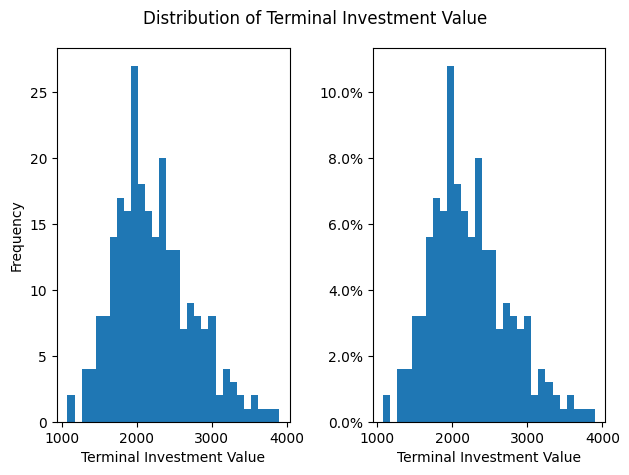

In [40]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
fig.suptitle('Distribution of Terminal Investment Value')
axs[0].set_xlabel('Terminal Investment Value')
axs[1].set_xlabel('Terminal Investment Value')
axs[0].set_ylabel('Frequency')

axs[0].hist(LastInvestmentValues, bins=30)
axs[1].hist(LastInvestmentValues, bins=30)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=250))


(e)(iii)

In [41]:
print("Least number of months to double: ", min(PeriodFirstDoubled))
print("Most number of months to double: ", max(PeriodFirstDoubled))

Least number of months to double:  36
Most number of months to double:  253


(e)(iv)

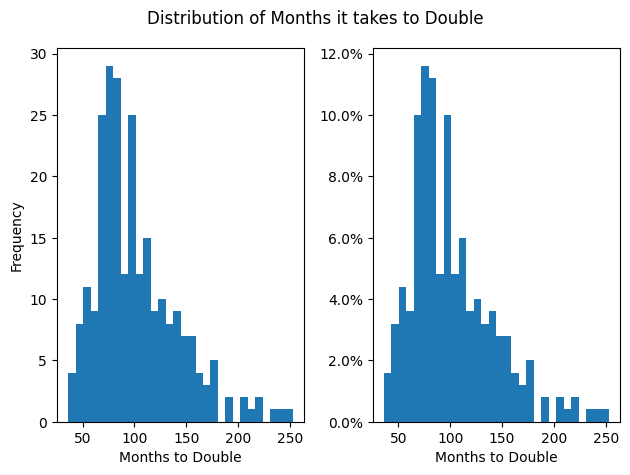

In [42]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
fig.suptitle('Distribution of Months it takes to Double')
axs[0].set_xlabel('Months to Double')
axs[1].set_xlabel('Months to Double')
axs[0].set_ylabel('Frequency')

axs[0].hist(PeriodFirstDoubled, bins=30)
axs[1].hist(PeriodFirstDoubled, bins=30)
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=250))

### 2. Logistic Sequence

The function calc_forrange, defined in the code below, given an integer $n$ in the `period` parameter, returns a data frame of the first $n$ elements of the logistic sequence for the inputted $a$ for parameter `a` and the initial element ($p_{0}$), given in the `init` parameter.

In [39]:
import numpy as np
import random
import pandas as pd
from functools import partial

def calc_nextvalue(init, a, prevvalue, i):
    if prevvalue == 0:
        prevvalue = init
        return init
    return a * prevvalue * (1 - prevvalue)

def calc_forrange(init, a, period):
    rangevalues = np.arange(period + 1)
    partialcalc = partial(calc_nextvalue, init, a)
    calc = np.frompyfunc(partialcalc, 2, 1)
    result = calc.accumulate(rangevalues)
    return pd.DataFrame(data=result, columns=['populationfraction'])

(a)

The following code prints the first 50 terms of six sequences with different $a$ and $p_{0}$ values.

In [40]:
# p0 = 0.5
# a = 2
print("For p0 = 0.5, a = 2")
print(calc_forrange(0.5, 2, 50))
#a = 2.5
print("For p0 = 0.5, a = 2.5")
print(calc_forrange(0.5, 2.5, 50))

# p0 = 0.1
# a = 2
print("For p0 = 0.1, a = 2")
print(calc_forrange(0.1, 2, 50))
# a = 2.5
print("For p0 = 0.1, a = 2.5")
print(calc_forrange(0.1, 2.5, 50))

For p0 = 0.5, a = 2
   populationfraction
0                   0
1                 0.5
2                 0.5
3                 0.5
4                 0.5
5                 0.5
6                 0.5
7                 0.5
8                 0.5
9                 0.5
10                0.5
11                0.5
12                0.5
13                0.5
14                0.5
15                0.5
16                0.5
17                0.5
18                0.5
19                0.5
20                0.5
21                0.5
22                0.5
23                0.5
24                0.5
25                0.5
26                0.5
27                0.5
28                0.5
29                0.5
30                0.5
31                0.5
32                0.5
33                0.5
34                0.5
35                0.5
36                0.5
37                0.5
38                0.5
39                0.5
40                0.5
41                0.5
42                0.5
43          

The limit seems to depend on the choice of $a$, but not on the choice of $p_{0}$.

(b)


Text(0.5, 1.0, 'a = 3.2')

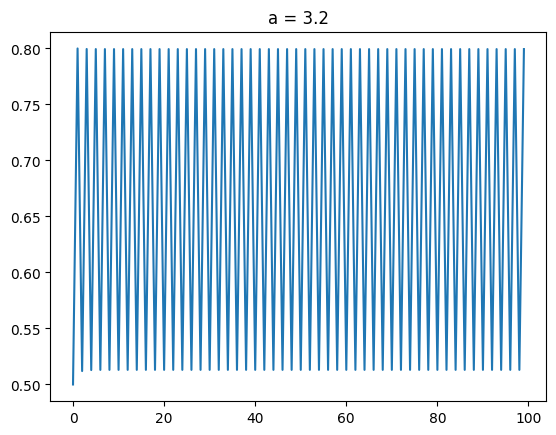

In [81]:
import matplotlib.pyplot as plt

terms = np.array(calc_forrange(0.5, 3.2, 100).tail(100))

plt.plot(terms)
plt.title("a = 3.2")

The terms bounce back and forth between two numbers with no limit in sight.

(c)


Text(0.5, 1.0, 'a = 3.45')

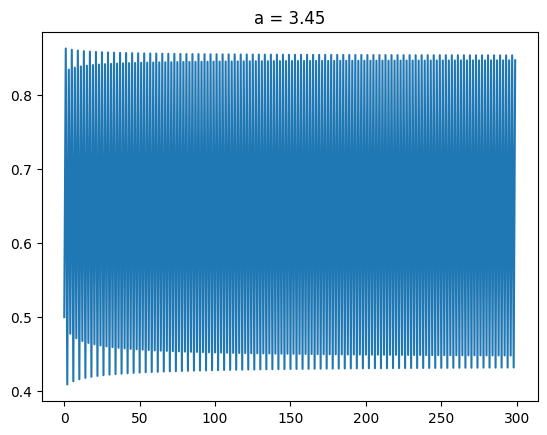

In [82]:
terms = np.array(calc_forrange(0.5, 3.45, 300).tail(300))

plt.plot(terms)
plt.title("a = 3.45")

The terms bounce back and forth between two numbers, but on every other "bounce", the terms don't "bounce" all the way (they bounce between a pair of numbers whose difference is slightly less). The gaps between these two sets of numbers that the terms bounce between seem to close as we take the limit.

(d)



Text(0.5, 1.0, 'a = 3.8 ; p0 = 0.1')

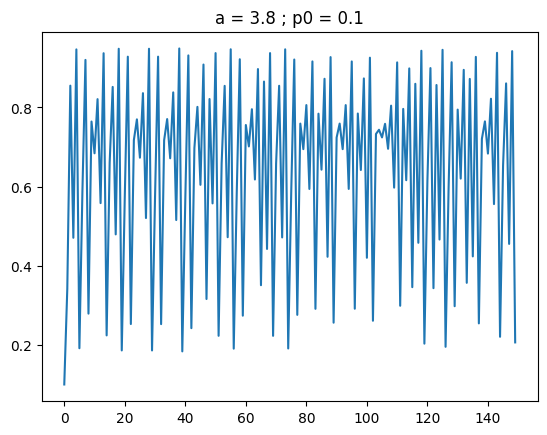

In [87]:
import matplotlib.pyplot as plt

import matplotlib as mpl

plt.plot(np.array(calc_forrange(0.1, 3.8, 150).tail(150)))
plt.title("a = 3.8 ; p0 = 0.1")

The behavior of this sequence seems pretty unpredictable, although, visually, it seems close to having some sort of pattern.

Text(0.5, 0.98, 'a = 3.8 ; p0 = 0.1 and 0.101')

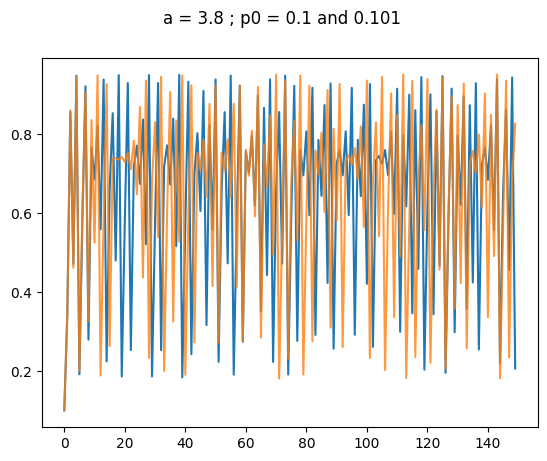

In [88]:
fig, axs = plt.subplots(1, 1)

axs.plot(np.array(calc_forrange(0.1, 3.8, 150).tail(150)))
axs.plot(np.array(calc_forrange(0.101, 3.8, 150).tail(150)), alpha=0.8)
fig.suptitle("a = 3.8 ; p0 = 0.1 and 0.101")

These two sequences plotted have a 0.01 difference between their $p_{0}$ values. The two sequences behave in similar ways, but the difference in their behavior seems unpredictable.